# Lesson 19 -  Correlation and MSE
These exercises are to help you check your understanding during class. They will not be collected.

## Part 1: Linear Function

### Exercise 0 - Set up
- Save your own copy of this notebook by using the menu opetion File > Save As.
- Now, **refresh the page**. The red icon in the upper right should no longer be visible. 
- Run the code in the first cell below to load the packages that that we will use today.
- Run the code in the second cell below to load the data that we will be using. 

In [4]:
# load the dypyr and ggplot2 packages
library('dplyr')
library('ggplot2')

# Resizes all plots
library(repr)
options(repr.plot.width=5, repr.plot.height=4)

In [5]:
# Load aritfical data
my_data <- read.csv('~/shared/data/artificial_data.csv')

### Exercise 1 - Plot Groups 1, 5, 6, 7
- In Lesson 17, you plotted the group 1 data and the best fit line. Do the same for groups 5, 6, and 7.
- Using only the graphs order the groups with respect to mean squared error.
- Using only the graphs order the groups with respect to correlation.

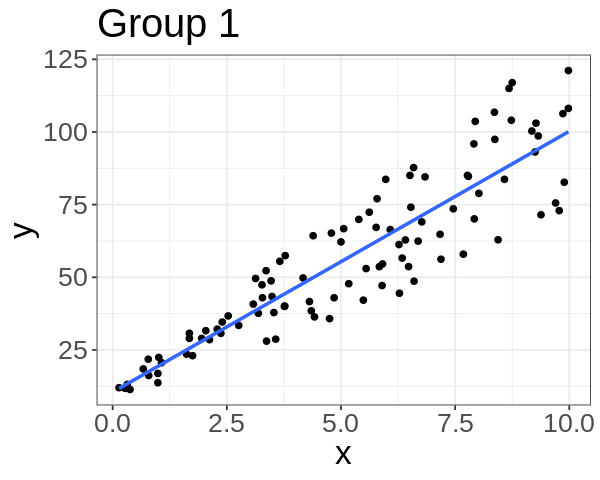

In [9]:
# Plot Group 1
ggplot(my_data, aes(x=x_value, y=group_1)) + 
    geom_point() +
    geom_smooth(method = 'lm', formula = 'y ~ x', se=FALSE) + 
    labs(title = "Group 1", x = 'x', y= 'y') +
    theme_bw() + 
    theme(text = element_text(size=20))

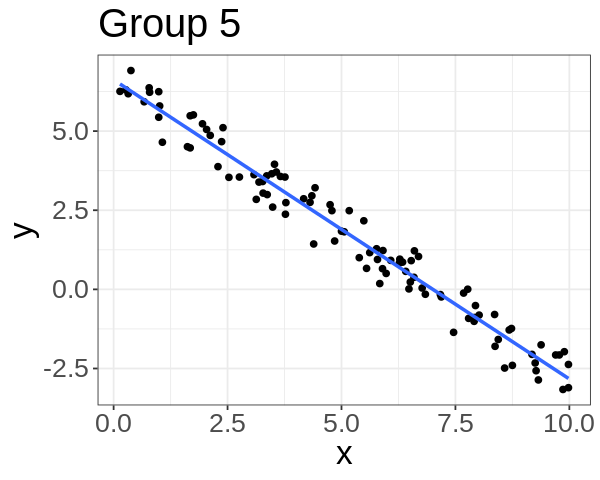

In [15]:
# Plot Group 5
ggplot(my_data, aes(x=x_value, y=group_5)) + 
    geom_point() +
    geom_smooth(method = 'lm', formula = 'y ~ x', se=FALSE) + 
    labs(title = "Group 5", x = 'x', y= 'y') +
    theme_bw() + 
    theme(text = element_text(size=20))

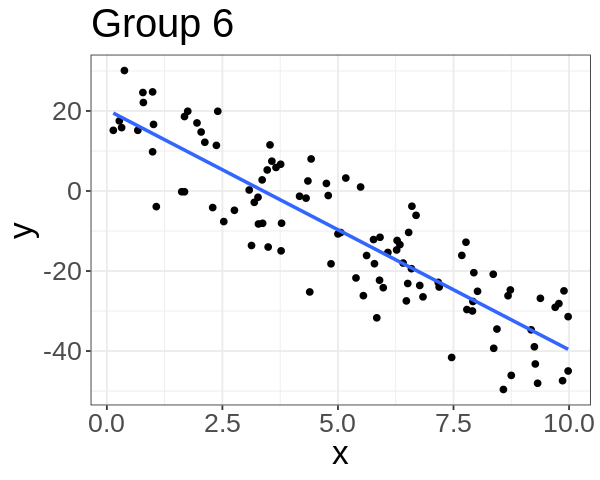

In [14]:
# Plot Group 6
ggplot(my_data, aes(x=x_value, y=group_6)) + 
    geom_point() +
    geom_smooth(method = 'lm', formula = 'y ~ x', se=FALSE) + 
    labs(title = "Group 6", x = 'x', y= 'y') +
    theme_bw() + 
    theme(text = element_text(size=20))

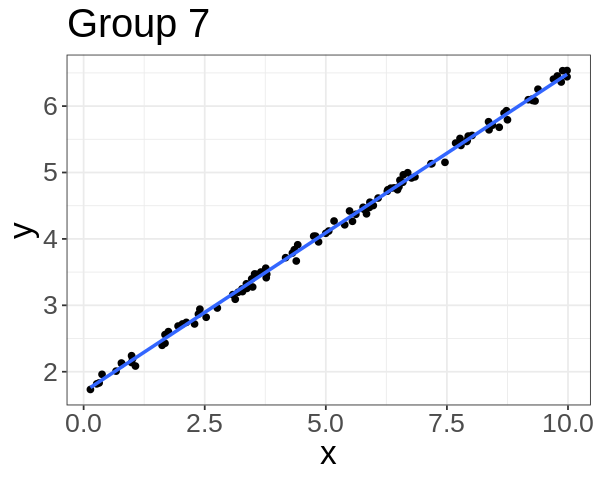

In [13]:
# Plot Group 7
ggplot(my_data, aes(x=x_value, y=group_7)) + 
    geom_point() +
    geom_smooth(method = 'lm', formula = 'y ~ x', se=FALSE) + 
    labs(title = "Group 7", x = 'x', y= 'y') +
    theme_bw() + 
    theme(text = element_text(size=20))

### Exercise 2 - Mean Squared error
- Compute the mean squared error of the best fit linear model for Groups 1, 5, 6, and 7.

In [17]:
mean(lm(formula = group_1 ~ x_value,  data = my_data)$residuals^2)
mean(lm(formula = group_5 ~ x_value,  data = my_data)$residuals^2)
mean(lm(formula = group_6 ~ x_value,  data = my_data)$residuals^2)
mean(lm(formula = group_7 ~ x_value,  data = my_data)$residuals^2)

[1] 138.5326

[1] 0.2348575

[1] 80.51869

[1] 0.003827464

Order from least to greatest is Group 7, Group 5, Group 6, Group 1

### Exercise 3 - Correlation
- Compute the correlation of the x values with groups 1, 5, 6, and 7.

```cor(DATAFRAME$VAR1, DATAFRAME$VAR2)```

In [18]:
cor(my_data$x_value, my_data$group_1)
cor(my_data$x_value, my_data$group_5)
cor(my_data$x_value, my_data$group_6)
cor(my_data$x_value, my_data$group_7)

[1] 0.9047254

[1] -0.9834794

[1] -0.881

[1] 0.9989278

Order from least to greatest is Group 5, Group 6, Group 1, Group 7.

## Data Generation

In [1]:
library(tidyr)

In [7]:
# Randomly generate coefficents
set.seed(111)
c = round(runif(15, 0,10),2)
noise = round(runif(100*7, 0,1),2)

my_data <- data.frame('x_value' = round(runif(100, 0,10),2))

my_data <- mutate(my_data, 
               group_1 = (c[1]*x_value + c[2]),
               group_2 = c[3]*x_value^2 + c[4]*x_value + c[5],
               group_3 = c[6]* exp(c[7]*2*x_value),
               group_4 = c[8]*exp(-c[9]/5*x_value),
                group_5 = -c[10]*x_value + c[11],
               group_6 = -c[12]*x_value + c[13],
                group_7 = c[14]*x_value + c[15]
              )

my_data <- mutate(my_data,
                 group_1 = group_1 + noise[1:100]*(c[1]*(x_value+1)),
                 group_2 = group_2 + noise[101:200]*(c[3]*(x_value^2 + 1)),
                 group_3 = group_3 + noise[201:300]*c[6]*0.5*exp(c[7]*x_value),
                 group_4 = group_4 + noise[301:400]*c[8]*exp(-c[9]/5*x_value),
                 group_5 = group_5 + noise[401:500]*(c[10]*(2)),
                group_6 = group_6 + noise[401:500]*(c[12]^(2)),
                  group_7 = group_7 + noise[401:500]*(c[14]*0.5),
                 )

write.csv(my_data, '~/shared/data/artificial_data.csv')

### Fancy summary table

In [16]:
my_data %>%
    select(-X) %>%
    pivot_longer(-x_value) %>%
    filter(name %in% c('group_1', 'group_5', 'group_6', 'group_7')) %>%
    group_by(name) %>%
    summarize(Cor = cor(x_value, value), 
              MSE = mean(lm(formula = y~x, 
                            data = data.frame(x = x_value, y = value)
                           )$residuals^2
                        )
             )

name,Cor,MSE
<chr>,<dbl>,<dbl>
group_1,0.9047254,1.385326e+02
group_5,-0.9834794,2.348575e-01
group_6,-0.8810000,8.051869e+01
group_7,0.9989278,3.827464e-03
